# --- SOLUTION ---

HINT: These solutions only give an impression on how the problems can be tackled. They are neither the best possible solutions nor are they always complete. You are invited to find approaches that outperform those given in the solutions and present them to your fellow students.

# Exercise : Data Preprocessing

In this exercise we will mainly focus on data preprocessing. Additionally, we will do some basic classification.

For a quick reference of how to work with pandas, you can use [this cheat sheet](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

## Task 1: The Data Set
In the following we will work with the Data Mining Cup Data Set of 2010:
- Download the data set from https://www.data-mining-cup.com/reviews/dmc-2010/
- Make yourself familiar with task and features
- Use the `pandas`-library to import the training data as a DataFrame
- Have an initial look at the data set. Are the features parsed correctly?

### Install Dependencies

In [1]:
%pip install numpy pandas matplotlib imblearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Import Data

In [2]:
# Use the pandas library to import the training data.
# Take a look at the training data to find out which of the import methods of pandas fits best.
# (https://pandas.pydata.org/pandas-docs/stable/reference/io.html)
import os
import pandas as pd

DATA_DIR = './data'
DATA_FILE = 'dmc2010_train.csv'

data_path = os.path.join(DATA_DIR, DATA_FILE)
data = pd.read_csv(data_path, sep=';')
print(data.head())

   customernumber        date  salutation  title  domain datecreated  \
0           41191  2008-12-01           0      0       9  2008-12-01   
1           38860  2008-12-16           1      0       4  2008-12-16   
2           61917  2008-08-19           0      0      12  2008-08-19   
3           40647  2008-06-16           1      0       8  2008-06-16   
4            1347  2008-08-08           0      0       1  2008-08-08   

   newsletter  model  paymenttype  deliverytype  ...  w2 w3  w4 w5  w6  w7  \
0           0      2            2             0  ...   0  0   0  0   0   0   
1           0      1            1             1  ...   0  0   0  0   0   0   
2           0      1            0             0  ...   0  0   0  0   0   0   
3           0      1            0             0  ...   0  0   0  2   0   0   
4           0      1            1             1  ...   2  0   0  0   0   0   

   w8  w9  w10  target90  
0   0   0    0         0  
1   0   0    0         0  
2   0   1    0   

/var/folders/sp/c9cmt9zd5mn1_1n29y4lkh1c0000gn/T/ipykernel_37393/2821316504.py:11: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path, sep=';')


### Handle Data Types

In [3]:



# convert date columns to datetime if not already
date_columns = ['datecreated', 'date', 'deliverydatepromised', 'deliverydatereal']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')


print(data.dtypes)

customernumber                   int64
date                    datetime64[ns]
salutation                       int64
title                            int64
domain                           int64
datecreated             datetime64[ns]
newsletter                       int64
model                            int64
paymenttype                      int64
deliverytype                     int64
invoicepostcode                  int64
delivpostcode                   object
voucher                          int64
advertisingdatacode             object
case                             int64
numberitems                      int64
gift                             int64
entry                            int64
points                           int64
shippingcosts                    int64
deliverydatepromised    datetime64[ns]
deliverydatereal        datetime64[ns]
weight                           int64
remi                             int64
cancel                           int64
used                     

### Dummy Variables

In [4]:
# Create data with dummy variables for saturation

nominal_columns = [
    'salutation', 'domain', 'model', 'paymenttype',
]
# Konvertieren der nominal und ordinal skalierten Spalten in Dummy-Variablen
data = pd.get_dummies(data, columns=nominal_columns)
for column in data.columns:
    print(f"Name: {column}, Typ: {data[column].dtype}")

data_for_correlation = data.drop(["invoicepostcode", "delivpostcode", "advertisingdatacode"],axis=1)



Name: customernumber, Typ: int64
Name: date, Typ: datetime64[ns]
Name: title, Typ: int64
Name: datecreated, Typ: datetime64[ns]
Name: newsletter, Typ: int64
Name: deliverytype, Typ: int64
Name: invoicepostcode, Typ: int64
Name: delivpostcode, Typ: object
Name: voucher, Typ: int64
Name: advertisingdatacode, Typ: object
Name: case, Typ: int64
Name: numberitems, Typ: int64
Name: gift, Typ: int64
Name: entry, Typ: int64
Name: points, Typ: int64
Name: shippingcosts, Typ: int64
Name: deliverydatepromised, Typ: datetime64[ns]
Name: deliverydatereal, Typ: datetime64[ns]
Name: weight, Typ: int64
Name: remi, Typ: int64
Name: cancel, Typ: int64
Name: used, Typ: int64
Name: w0, Typ: int64
Name: w1, Typ: int64
Name: w2, Typ: int64
Name: w3, Typ: int64
Name: w4, Typ: int64
Name: w5, Typ: int64
Name: w6, Typ: int64
Name: w7, Typ: int64
Name: w8, Typ: int64
Name: w9, Typ: int64
Name: w10, Typ: int64
Name: target90, Typ: int64
Name: salutation_0, Typ: bool
Name: salutation_1, Typ: bool
Name: salutation

### Remove Chars

In [5]:
data = data.drop(["invoicepostcode", "delivpostcode", "advertisingdatacode"],axis=1)

## Task 2: Data Visualisation
Now, we inspect the data in order to find out what kinds of problems we need to tackle during preprocessing. Most importantly, we want to answer the following questions:
- Which features have a high correlation with each other and are candidates for removal?
- Which features are the most important ones (i.e. correlate best with the label)?
- What other special characteristics can be found for the features of the data set? (keep the last lecture in mind!) 

### Correlation Matrix

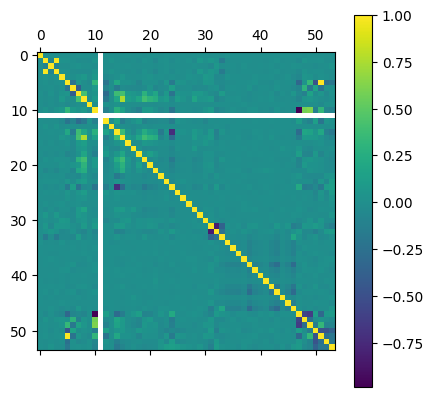

In [6]:
# Exclude non-numeric columns from correlation calculation
# numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = data_for_correlation.corr()

# Visualize the correlations
plt.matshow(correlation_matrix)
plt.colorbar()

plt.show()



### Highest Correlation

In [7]:
# Retain upper triangular values of correlation matrix and 
# make Lower triangular values Null 
upper_corr_mat = correlation_matrix.where( 
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))   
  
# Convert to 1-D series and drop Null values 
unique_corr_pairs = upper_corr_mat.unstack().dropna() 

# Sort correlation pairs 
sorted_mat = unique_corr_pairs.sort_values() 
print(sorted_mat) 

model_1        entry              -0.986111
salutation_1   salutation_0       -0.826062
w5             deliverydatereal   -0.714944
model_3        model_1            -0.636628
model_2        model_1            -0.574871
                                     ...   
               entry               0.580456
model_3        entry               0.614996
weight         numberitems         0.765553
datecreated    date                0.981074
paymenttype_1  deliverytype        1.000000
Length: 1378, dtype: float64


### Other Preprocessing

In [8]:
# What else could be important in the data set? Try to think of topics treated in the lecture!
# Check out the preprocessing-documentation of sklearn for additional ideas:
# https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing



## Task 3: Classification
Before we do any preprocessing, we first build our classification pipeline. We then use it during the preprocessing to evaluate whether our modifications have an impact on the performance of the classification.
- Complete the `evaluate_classification` function.
  - Use DecisionTree as classification algorithms
  - Use 10-fold cross-validation
  - Print accuracy, precision, recall, and F1-measure
- Use `evaluate_classification` to get some baseline results

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder

def convert_dates_to_separate_columns(data):
    # convert date columns to datetime if not already
    date_columns = ['datecreated', 'date', 'deliverydatepromised', 'deliverydatereal']
    for col in date_columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')

    # extract year, month, day from each date column
    for col in date_columns:
        data[col + '_year'] = data[col].dt.year
        data[col + '_month'] = data[col].dt.month
        data[col + '_day'] = data[col].dt.day

    # drop original date columns
    return data

# drop original date columns
classification_data = convert_dates_to_separate_columns(data).drop(date_columns, axis=1)



### Classification

In [10]:
def evaluate_classification(X, y):
    # Split the data into training and test data
    # Use a DecisionTreeClassifier with default parameters
    # Use cross-validation with 10 folds
    # Return the mean accuracy, precision, recall and f1-score
    # of the DecisionTreeClassifier
    clf = DecisionTreeClassifier()
    cv = StratifiedKFold(n_splits=10)
    scores = cross_validate(clf, X, y, cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1'])
  
    return scores

def print_scores_and_statistics(scores):
    # Print the scores for each fold
    scores_df = pd.DataFrame({
        'Fold': np.arange(1, len(scores['test_accuracy']) + 1),
        'Accuracy': scores['test_accuracy'],
        'Precision': scores['test_precision'],
        'Recall': scores['test_recall'],
        'F1 Score': scores['test_f1']
    })
    print("Scores:\n", scores_df)

    # Calculate and print the min, median, max for each score
    metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']
    statistics = pd.DataFrame(index=metrics, columns=['Min', 'Median', 'Max'])

    for metric in metrics:
        statistics.loc[metric, 'Min'] = np.min(scores[metric])
        statistics.loc[metric, 'Median'] = np.median(scores[metric])
        statistics.loc[metric, 'Max'] = np.max(scores[metric])
        
    print("\nStatistics:\n", statistics)

scores = evaluate_classification(classification_data.drop('target90', axis=1), classification_data['target90'])
print_scores_and_statistics(scores)

Scores:
    Fold  Accuracy  Precision    Recall  F1 Score
0     1  0.697502   0.222714  0.249587  0.235386
1     2  0.698736   0.197068  0.200000  0.198523
2     3  0.699352   0.236467  0.274380  0.254017
3     4  0.699044   0.233859  0.269421  0.250384
4     5  0.694727   0.225392  0.261157  0.241960
5     6  0.696886   0.221239  0.247934  0.233827
6     7  0.684243   0.187779  0.208264  0.197492
7     8  0.702744   0.233631  0.259076  0.245696
8     9  0.708822   0.234742  0.247934  0.241158
9    10  0.698334   0.213518  0.229752  0.221338

Statistics:
                      Min    Median       Max
test_accuracy   0.684243  0.698535  0.708822
test_precision  0.187779  0.224053  0.236467
test_recall          0.2   0.24876   0.27438
test_f1         0.197492  0.238272  0.254017


## Task 4: Basic Preprocessing
We start with some initial preprocessing steps. Check, whether the following modifications improve your results:
- Experiment with different feature sets (i.e. only use some features, or discard some irrelevant features)
- Tackle the problem of imbalanced label distributions (you might need an adapted version of `evaluate_classification`)
- Impute missing values using the methods of the lecture (default, min, max, avg, ..)

In [11]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

def preprocessing_and_evaluate(df):
    # Select features and target variable:
    drop_columns = ['target90']
    X = df.drop(drop_columns, axis=1)

    y = df['target90']

    # Impute missing values:
    imputer = SimpleImputer(strategy='most_frequent')
    X_imputed = imputer.fit_transform(X)

    # Balance label distributions with SMOTE:
    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote.fit_resample(X_imputed, y)
    
    # Evaluate:
    scores = evaluate_classification(X_balanced, y_balanced)
    return scores

# Now you can call the function
results = preprocessing_and_evaluate(classification_data)
print_scores_and_statistics(results)

Scores:
    Fold  Accuracy  Precision    Recall  F1 Score
0     1  0.519333   0.556793  0.189538  0.282805
1     2  0.526914   0.577851  0.199773  0.296901
2     3  0.783927   0.794650  0.765732  0.779923
3     4  0.884761   0.816792  0.992039  0.895926
4     5  0.890427   0.823640  0.993553  0.900653
5     6  0.884550   0.818668  0.987865  0.895343
6     7  0.885877   0.818666  0.991278  0.896741
7     8  0.885877   0.818324  0.992039  0.896847
8     9  0.888341   0.821664  0.992039  0.898849
9    10  0.889479   0.823622  0.991281  0.899708

Statistics:
                      Min    Median       Max
test_accuracy   0.519333  0.885319  0.890427
test_precision  0.556793  0.818495   0.82364
test_recall     0.189538   0.99128  0.993553
test_f1         0.282805  0.896334  0.900653


In [12]:
# Create an adapted version of 'evaluate_classification' to tackle the problem of imbalanced label distributions:
# You can either try to balance the training data during cross-validation (which is cumbersome)
# or you check whether the classification algorithms have their own mechanisms of dealing with imbalanced labels



Idea: Using the `class_weight`-hyperparameter to balance the data set increases the performance of the Decision Tree classifier. 

In [13]:
# Are there missing values in the data set? Try to impute them using different mechanisms.
# Imputation with pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html



Conclusion: Simple imputation of missing values does not help.

## Task 5: Feature Generation
Now we generate additional features to improve the classification results. Try to find features that are usefull in this shopping scenario. Check whether the generated features improve the performance of your classification.
- Generate new features from the existing date features (ask yourself which times/days/months you usually shop)

In [14]:
# Generate features from existing date features. Try to think of features that define the actual shopping behavior.
# Use pandas to deal with dates: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

feature_data = convert_dates_to_separate_columns(data)
for col in date_columns:
    feature_data[col + '_weekday'] = feature_data[col].dt.dayofweek # Monday=0, Sunday=6 Dummy Variable?
    feature_data[col + '_is_weekend'] = feature_data[col].dt.dayofweek >= 5

# extract month
for col in date_columns:
    feature_data[col + '_month'] = feature_data[col].dt.month # Dummy Variable?

# calculate differences between dates
feature_data['days_between_date_and_datecreated'] = (feature_data['date'] - feature_data['datecreated']).dt.days

# drop original date columns
feature_data = feature_data.drop(date_columns, axis=1)

In [15]:
scores1 = evaluate_classification(feature_data.drop('target90', axis=1), feature_data['target90'])
scores2 = preprocessing_and_evaluate(feature_data)

print_scores_and_statistics(scores1)
print("\n--------------------------------------------------- \nScores after preprocessing:")
print_scores_and_statistics(scores2)

Scores:
    Fold  Accuracy  Precision    Recall  F1 Score
0     1  0.705828   0.230294  0.246281  0.238019
1     2  0.699044   0.199352  0.203306  0.201309
2     3  0.690410   0.215407  0.249587  0.231240
3     4  0.701511   0.247566  0.294215  0.268882
4     5  0.705828   0.248196  0.284298  0.265023
5     6  0.698427   0.214395  0.231405  0.222576
6     7  0.678693   0.182874  0.208264  0.194745
7     8  0.712612   0.247678  0.264026  0.255591
8     9  0.699260   0.226331  0.252893  0.238876
9    10  0.709439   0.237129  0.251240  0.243981

Statistics:
                      Min    Median       Max
test_accuracy   0.678693  0.700385  0.712612
test_precision  0.182874  0.228313  0.248196
test_recall     0.203306  0.250413  0.294215
test_f1         0.194745  0.238448  0.268882

--------------------------------------------------- 
Scores after preprocessing:
Scores:
    Fold  Accuracy  Precision    Recall  F1 Score
0     1  0.532221   0.591006  0.209249  0.309071
1     2  0.524829   0.57

Conclusion: Feature engineering minimally improves the results but neither manually created features nor features generated with PCA are able to provide much additional value here.

## Task 6: Optimisation
Finally, try to optimise your results by tweaking individual parts of the classification process. How much better can the results get?

In [16]:
# OPEN END QUESTION - try to improve your results as much as possible!
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definieren Sie das Parametergitter
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Erstellen Sie das Modell
model = RandomForestClassifier()

# Erstellen Sie die Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Führen Sie die Grid Search aus
grid_search.fit(feature_data.drop(['target90'], axis=1), feature_data['target90'])

# Drucken Sie die besten Parameter aus
print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}


In [17]:
# Erstellen Sie das Modell mit den besten Parametern
final_model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2)

# Trainieren Sie das Modell
final_model.fit(feature_data.drop(['target90'], axis=1), feature_data['target90'])

RandomForestClassifier(max_depth=10, n_estimators=50)

In [18]:
# import new data
NEW_DATA_FILE = 'dmc2010_class.txt'
new_data_path = os.path.join(DATA_DIR, NEW_DATA_FILE)
new_data = pd.read_csv(new_data_path,sep=';')

date_columns = ['datecreated', 'date', 'deliverydatepromised', 'deliverydatereal']
for col in date_columns:
    new_data[col] = pd.to_datetime(new_data[col], errors='coerce')

nominal_columns = [
    'salutation', 'domain', 'model', 'paymenttype',
]
# Konvertieren der nominal und ordinal skalierten Spalten in Dummy-Variablen
new_data = pd.get_dummies(new_data, columns=nominal_columns)
for column in new_data.columns:
    print(f"Name: {column}, Typ: {new_data[column].dtype}")

new_data = new_data.drop(["invoicepostcode", "delivpostcode", "advertisingdatacode"],axis=1)

new_data = convert_dates_to_separate_columns(new_data)

feature_data = new_data
for col in date_columns:
    feature_data[col + '_weekday'] = feature_data[col].dt.dayofweek # Monday=0, Sunday=6 Dummy Variable?
    feature_data[col + '_is_weekend'] = feature_data[col].dt.dayofweek >= 5

# extract month
for col in date_columns:
    feature_data[col + '_month'] = feature_data[col].dt.month # Dummy Variable?

# calculate differences between dates
feature_data['days_between_date_and_datecreated'] = (feature_data['date'] - feature_data['datecreated']).dt.days

# drop original date columns
feature_data = feature_data.drop(date_columns, axis=1)

# Vorhersagen auf neuen Daten treffen
predictions = final_model.predict(feature_data)

Name: customernumber, Typ: int64
Name: date, Typ: datetime64[ns]
Name: title, Typ: int64
Name: datecreated, Typ: datetime64[ns]
Name: newsletter, Typ: int64
Name: deliverytype, Typ: int64
Name: invoicepostcode, Typ: object
Name: delivpostcode, Typ: object
Name: voucher, Typ: int64
Name: advertisingdatacode, Typ: object
Name: case, Typ: int64
Name: numberitems, Typ: int64
Name: gift, Typ: int64
Name: entry, Typ: int64
Name: points, Typ: int64
Name: shippingcosts, Typ: int64
Name: deliverydatepromised, Typ: datetime64[ns]
Name: deliverydatereal, Typ: datetime64[ns]
Name: weight, Typ: int64
Name: remi, Typ: int64
Name: cancel, Typ: int64
Name: used, Typ: int64
Name: w0, Typ: int64
Name: w1, Typ: int64
Name: w2, Typ: int64
Name: w3, Typ: int64
Name: w4, Typ: int64
Name: w5, Typ: int64
Name: w6, Typ: int64
Name: w7, Typ: int64
Name: w8, Typ: int64
Name: w9, Typ: int64
Name: w10, Typ: int64
Name: salutation_0, Typ: bool
Name: salutation_1, Typ: bool
Name: salutation_2, Typ: bool
Name: domain

/var/folders/sp/c9cmt9zd5mn1_1n29y4lkh1c0000gn/T/ipykernel_37393/3792564775.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data = pd.read_csv(new_data_path,sep=';')
